In [8]:
# Cell 1: Imports & Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import time


In [9]:
# Cell 2: Dataset Generation (Synthetic)
np.random.seed(42)
size = 1000

vibration = np.random.uniform(0.2, 1.5, size)
temperature = np.random.uniform(60, 120, size)

# Failure if temp > 90 or vib > 1.0
labels = ((temperature > 90) | (vibration > 1.0)).astype(int)

df = pd.DataFrame({
    'Vibration': vibration,
    'Temperature': temperature,
    'Failure': labels
})

print(df.head())


   Vibration  Temperature  Failure
0   0.686902    71.107976        0
1   1.435929    92.514057        1
2   1.151592   112.376750        1
3   0.978256   103.933493        1
4   0.402824   108.393669        1


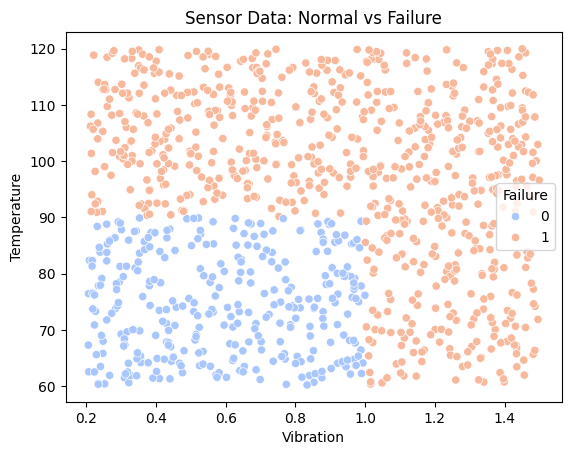

In [10]:
# Cell 3: Visualize Data
sns.scatterplot(x='Vibration', y='Temperature', hue='Failure', data=df, palette='coolwarm')
plt.title('Sensor Data: Normal vs Failure')
plt.show()


In [11]:
# Cell 4: RandomForest Model Training
X = df[['Vibration', 'Temperature']]
y = df['Failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 69   1]
 [  0 130]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        70
           1       0.99      1.00      1.00       130

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
# Cell 5: Save Model (for future use)
import joblib
joblib.dump(clf, 'rca_random_forest_model.pkl')


['rca_random_forest_model.pkl']

In [17]:
# Cell 6: Real-Time Monitoring Simulation (fixed)
print("Real-Time Monitoring Simulation:\n")
for i in range(10):
    vib = np.random.uniform(0.2, 1.5)
    temp = np.random.uniform(60, 120)
    new_data = pd.DataFrame({'Vibration': [vib], 'Temperature': [temp]})
    prediction = clf.predict(new_data)[0]
    status = 'FAILURE' if prediction == 1 else 'Normal'
    print(f"Sensor Reading {i+1}: Vibration={vib:.2f}g, Temp={temp:.1f}°C --> {status}")
    time.sleep(1)


Real-Time Monitoring Simulation:

Sensor Reading 1: Vibration=0.88g, Temp=118.6°C --> FAILURE
Sensor Reading 2: Vibration=0.36g, Temp=61.0°C --> Normal
Sensor Reading 3: Vibration=1.20g, Temp=108.4°C --> FAILURE
Sensor Reading 4: Vibration=0.36g, Temp=75.9°C --> Normal
Sensor Reading 5: Vibration=0.22g, Temp=77.6°C --> Normal
Sensor Reading 6: Vibration=1.21g, Temp=91.1°C --> FAILURE
Sensor Reading 7: Vibration=0.65g, Temp=82.3°C --> Normal
Sensor Reading 8: Vibration=0.20g, Temp=78.0°C --> Normal
Sensor Reading 9: Vibration=1.04g, Temp=118.5°C --> FAILURE
Sensor Reading 10: Vibration=1.30g, Temp=61.4°C --> FAILURE


In [20]:
# Cell 7: Prepare Sliding Window Features (no TensorFlow)

SEQ_LEN = 5
X_seq = []
y_seq = []

# Flatten sliding windows into single feature vectors
for i in range(len(X) - SEQ_LEN):
    window = X[i:i+SEQ_LEN].to_numpy().flatten()  # Convert to NumPy first
    X_seq.append(window)
    y_seq.append(labels[i+SEQ_LEN])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

print(f"Shape of X_seq: {X_seq.shape}")  # e.g., (95, 10)
print(f"Shape of y_seq: {y_seq.shape}")  # e.g., (95,)


Shape of X_seq: (995, 10)
Shape of y_seq: (995,)


In [ ]:
# Cell 8: Real-Time Simulation (Aggregated Model)
print("\nAggregated Real-Time Monitoring (sliding window of 5):\n")

window = []

for i in range(5):  # build initial window
    vib = np.random.uniform(0.2, 1.5)
    temp = np.random.uniform(60, 120)
    window.append({'Vibration': vib, 'Temperature': temp})
    print(f"Reading {i+1}: Vibration={vib:.2f}g, Temp={temp:.1f}°C")

while True:
    df_window = pd.DataFrame(window)
    # Extract features
    vib_mean = df_window['Vibration'].mean()
    vib_std = df_window['Vibration'].std()
    temp_mean = df_window['Temperature'].mean()
    temp_std = df_window['Temperature'].std()
    max_vib = df_window['Vibration'].max()
    max_temp = df_window['Temperature'].max()

    features = pd.DataFrame([[
        vib_mean, vib_std, temp_mean, temp_std, max_vib, max_temp
    ]], columns=['Vib_Mean', 'Vib_Std', 'Temp_Mean', 'Temp_Std', 'Vib_Max', 'Temp_Max'])

    prediction = agg_clf.predict(features)[0]
    status = 'FAILURE' if prediction == 1 else 'Normal'
    print(f"\n[Aggregated Prediction] Window Status: {status}")

    # Add new reading to window
    vib = np.random.uniform(0.2, 1.5)
    temp = np.random.uniform(60, 120)
    print(f"New Reading: Vibration={vib:.2f}g, Temp={temp:.1f}°C")
    window.append({'Vibration': vib, 'Temperature': temp})
    window.pop(0)  # keep window size constant

    time.sleep(2)



Aggregated Real-Time Monitoring (sliding window of 5):

Reading 1: Vibration=1.05g, Temp=74.4°C
Reading 2: Vibration=0.45g, Temp=115.1°C
Reading 3: Vibration=0.33g, Temp=90.4°C
Reading 4: Vibration=0.49g, Temp=62.3°C
Reading 5: Vibration=0.25g, Temp=70.5°C

[Aggregated Prediction] Window Status: Normal
New Reading: Vibration=1.33g, Temp=76.9°C

[Aggregated Prediction] Window Status: Normal
New Reading: Vibration=1.44g, Temp=94.9°C

[Aggregated Prediction] Window Status: FAILURE
New Reading: Vibration=0.77g, Temp=94.8°C

[Aggregated Prediction] Window Status: FAILURE
New Reading: Vibration=0.87g, Temp=105.5°C

[Aggregated Prediction] Window Status: FAILURE
New Reading: Vibration=0.57g, Temp=81.2°C

[Aggregated Prediction] Window Status: FAILURE
New Reading: Vibration=1.36g, Temp=116.8°C

[Aggregated Prediction] Window Status: FAILURE
New Reading: Vibration=1.36g, Temp=85.2°C

[Aggregated Prediction] Window Status: FAILURE
New Reading: Vibration=1.21g, Temp=88.6°C

[Aggregated Predictio

In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn networkx


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 1.6 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 1.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate a time index
time_index = pd.date_range(start='2025-01-01', periods=1000, freq='H')

# Simulate sensor readings
=vibration = np.random.normal(loc=0.0, scale=1.0, size=1000)
temperature = np.random.normal(loc=25.0, scale=0.5, size=1000)
pressure = np.random.normal(loc=1.0, scale=0.1, size=1000)

# Introduce anomalies
vibration[500:510] += 5  # Sudden spike in vibration
temperature[700:710] += 3  # Sudden increase in temperature
pressure[300:305] -= 0.5  # Sudden drop in pressure

# Create a DataFrame=
df = pd.DataFrame({
    'timestamp': time_index,
    'vibration': vibration,
    'temperature': temperature,
    'pressure': pressure
})

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Display the first few rows
df.head()


C:\Users\priya\AppData\Local\Temp\ipykernel_2632\4126930556.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start='2025-01-01', periods=1000, freq='H')


,vibration,temperature,pressure
timestamp,,,
2025-01-01 00:00:00,0.496714,25.699678,0.932482
2025-01-01 01:00:00,-0.138264,25.462317,0.985548
2025-01-01 02:00:00,0.647689,25.029815,0.920758
2025-01-01 03:00:00,1.523030,24.676532,0.969204
2025-01-01 04:00:00,-0.234153,25.349112,0.810639


In [5]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = df.apply(zscore)

# Define a threshold for anomalies
threshold = 3

# Identify anomalies
anomalies = (np.abs(z_scores) > threshold)

# Display anomalies
anomalies.sum()


vibration      12
temperature    10
pressure        6
dtype: int64

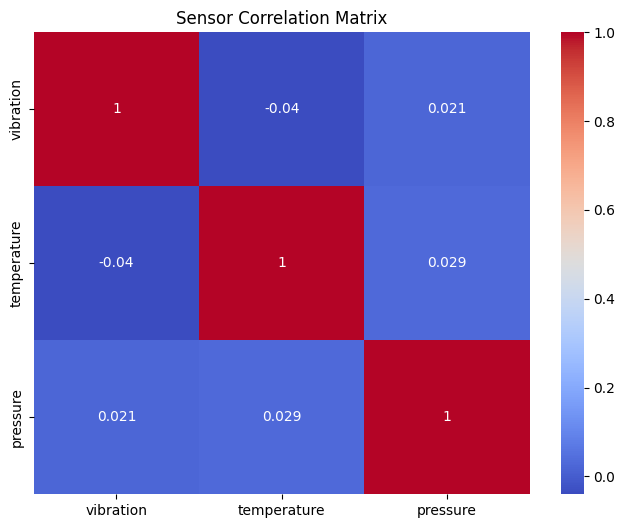

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Sensor Correlation Matrix')
plt.show()


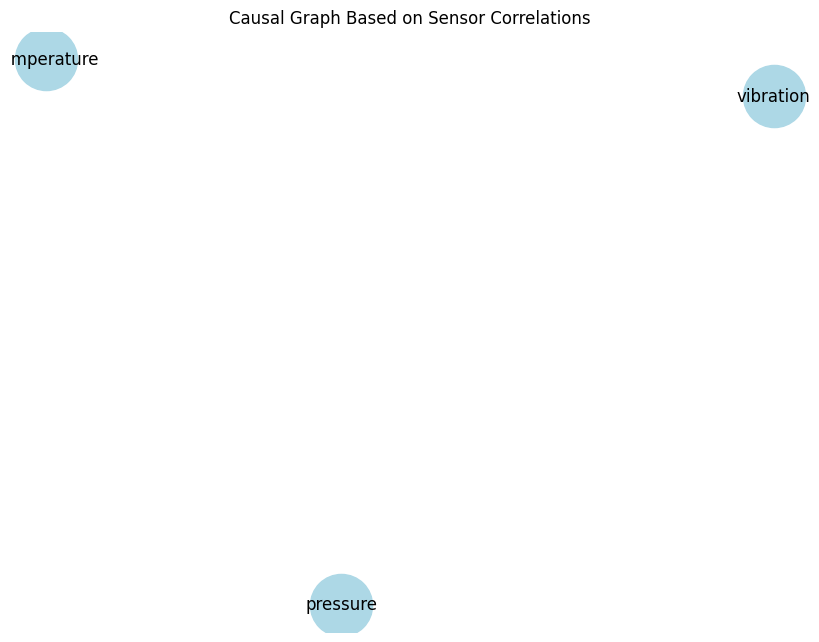

In [7]:
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes representing sensors
for sensor in df.columns:
    G.add_node(sensor)

# Add edges based on significant correlations (e.g., correlation coefficient > 0.7)
for i in df.columns:
    for j in df.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > 0.7:
            G.add_edge(i, j, weight=corr_matrix.loc[i, j])

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
plt.title('Causal Graph Based on Sensor Correlations')
plt.show()


In [8]:
# Identify sensors with anomalies
anomalous_sensors = anomalies.any(axis=0)
anomalous_nodes = anomalous_sensors[anomalous_sensors].index.tolist()

# Function to find root causes
def find_root_causes(graph, anomalous_nodes):
    root_causes = []
    for node in anomalous_nodes:
        predecessors = list(graph.predecessors(node))
        if not predecessors:
            root_causes.append(node)
    return root_causes

# Find root causes
root_causes = find_root_causes(G, anomalous_nodes)
print("Potential Root Causes:", root_causes)


Potential Root Causes: ['vibration', 'temperature', 'pressure']
